In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score,roc_auc_score
import seaborn as sns

In [2]:
data = load_iris()

In [3]:
X = pd.DataFrame(data['data'],columns=data.feature_names)
y = pd.DataFrame(data['target'],columns=['y'])

In [4]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [5]:
modelo = LinearDiscriminantAnalysis()

In [6]:
modelo.fit(Xt,yt)

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LinearDiscriminantAnalysis()

In [7]:
print(accuracy_score(y_pred=modelo.predict(Xt),y_true=yt))
print(accuracy_score(y_pred=modelo.predict(Xv),y_true=yv))

0.9809523809523809
0.9777777777777777


In [8]:
tsne = TSNE(n_components=2,n_jobs=-1)

In [9]:
X = pd.DataFrame(tsne.fit_transform(X),columns=['d1','d2'])

In [12]:
dict(zip(range(3),data.target_names))

{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [14]:
X['y^'] = modelo.predict(data['data'])
X['y'] = y

for c in ['y','y^']:
    X[c].replace(dict(zip(range(3),data.target_names)),inplace=True)

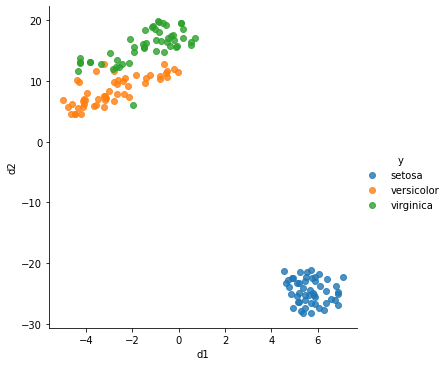

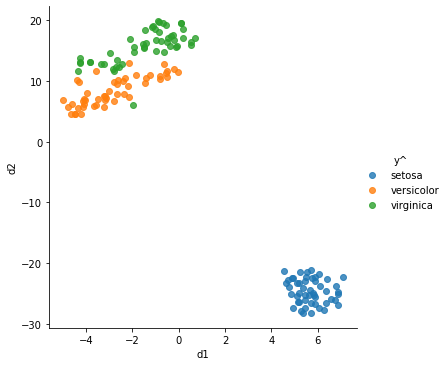

In [15]:
sns.lmplot(data=X,x='d1',y='d2',fit_reg=False,hue='y')
sns.lmplot(data=X,x='d1',y='d2',fit_reg=False,hue='y^')